
  # <center> **Penggunaan Convolutional Neural Networks (CNN) untuk Mengolah Dataset MNIST**</center>



Notebook ini bertujuan untuk memberikan pemahaman tentang bagaimana menggunakan Convolutional Neural Networks (CNN) untuk mengklasifikasikan gambar tulisan tangan dari dataset MNIST.
</br>
</br>
-- Muhammad Ivan Aldorino </br>
[GitHub](https://github.com/valselt) [LinkedIn](https://www.linkedin.com/in/muhammadivanaldorino/)


## 0. Import Dataset

In [67]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import pandas as pd

In [41]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

[MNIST](https://keras.io/api/datasets/mnist/) (Modified National Institute of Standards and Technology) adalah salah satu dataset yang paling dikenal dalam bidang pembelajaran mesin, yang terdiri dari 70.000 gambar digit tulisan tangan yang digunakan sebagai benchmark untuk Pattern Recognition. </br></br>
Dengan 60.000 gambar untuk pelatihan dan 10.000 untuk pengujian, dataset ini menjadi alat untuk menguji berbagai teknik pembelajaran mesin, terutama Convolutional Neural Networks (CNN).

## 1. Dataset Understanding

### 1.1 train_images

In [42]:
type(train_images)




numpy.ndarray

In [43]:
train_images.dtype

dtype('uint8')

Dari kode diatas, kelihatan bahwa `train_images` merupakan sebuah **array NumPy** yang berisi **uint8** atau unsigned 8-bit integer

In [44]:
train_images.ndim

3

Dimensi dari `train_images` adalah 3 Dimensi

In [45]:
train_images.shape

(60000, 28, 28)

`train_images` memiliki 60.000 gambar berukuran 28 x 28 pixel yang dapat digunakan untuk training

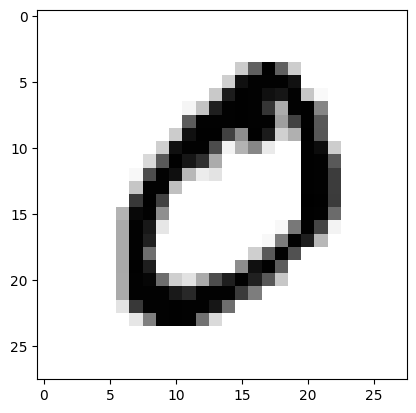

In [46]:
plt.imshow(train_images[1,:,:], cmap = plt.cm.binary)
plt.show()



`train_images[1,:,:]`


Berfungsi untuk mengambil gambar kedua dari dataset pelatihan (indeks 1) dan semua baris dan kolomnya.
<br /><br />
**[INGAT, KARENA INDEX MULAI DARI 0]**
<br /><br />
`cmap = plt.cm.binary`

digunakan untuk mengatur colormap menjadi biner, yang menampilkan gambar dalam skala hitam-putih.

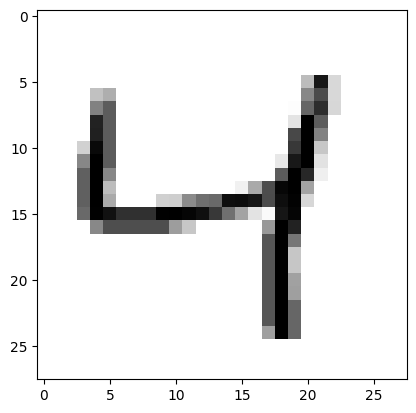

In [47]:
plt.imshow(train_images[2,:,:], cmap = plt.cm.binary)
plt.show()

`train_images[2,:,:]`


Berfungsi untuk mengambil gambar ketiga dari dataset pelatihan (indeks 2) dan semua baris dan kolomnya.
<br /><br />
**[INGAT, KARENA INDEX MULAI DARI 0]**

### 1.2 train_labels

In [48]:
type(train_labels)


numpy.ndarray

In [49]:
train_labels.dtype

dtype('uint8')

In [50]:
train_labels.ndim

1

Dimensi dari `train_labels` adalah 1 Dimensi

In [51]:
train_labels.shape

(60000,)

`train_labels` berisi 60.000 label dan tidak ada keterangan pixel karena ini merupakan labeling

In [52]:
train_labels[1]

0

ini sesuai dengan </br>
`plt.imshow(train_images[1,:,:], cmap = plt.cm.binary)`</br>
`plt.show()`

dimana gambar tulisan tangannya adalah 0

In [53]:
train_labels[2]

4

ini sesuai dengan </br>
`plt.imshow(train_images[2,:,:], cmap = plt.cm.binary)`</br>
`plt.show()`

dimana gambar tulisan tangannya adalah 4

### 1.3 test_images

In [54]:
type(test_images)

numpy.ndarray

In [55]:
test_images.dtype

dtype('uint8')

In [56]:
test_images.ndim

3

In [57]:
test_images.shape

(10000, 28, 28)

`test_images` memiliki 10.000 gambar berukuran 28 x 28 pixel yang dapat digunakan untuk testing

### 1.4 test_labels

In [58]:
type(test_labels)

numpy.ndarray

In [59]:
test_labels.dtype

dtype('uint8')

In [60]:
test_labels.ndim

1

In [61]:
test_labels.shape

(10000,)

`test_labels` berisi 10.000 label dan tidak ada keterangan pixel karena ini merupakan labeling

### 1.5 Intermezzo : Tentang Dataset


#### 1.5.1 Menampilkan 100 Gambar Training Data Pertama

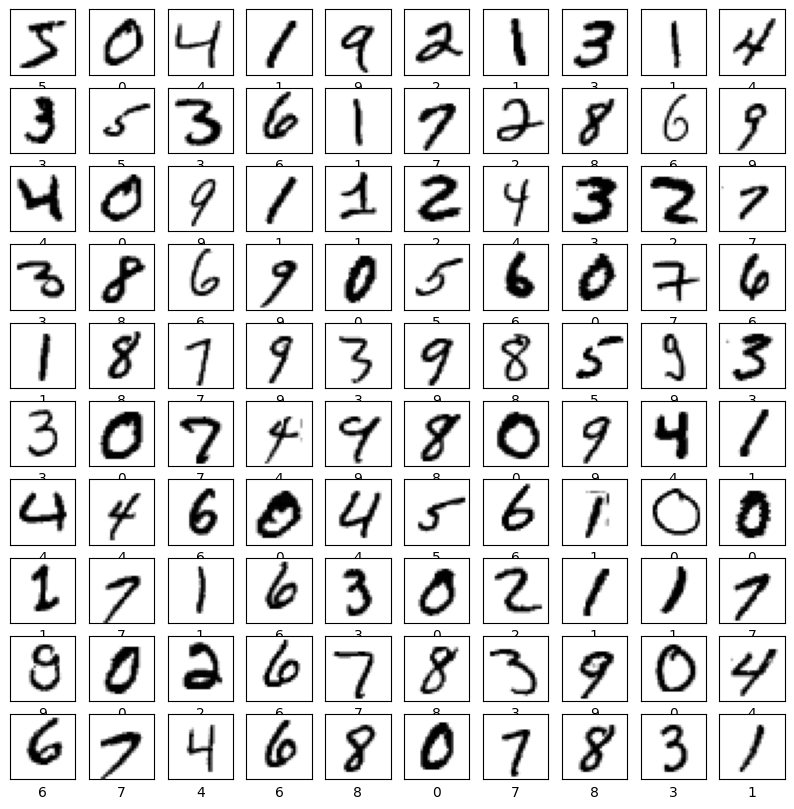

In [64]:
plt.figure(figsize=(10,10))
for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

#### 1.5.2 Menampilkan 1000 Gambar Training Data Pertama

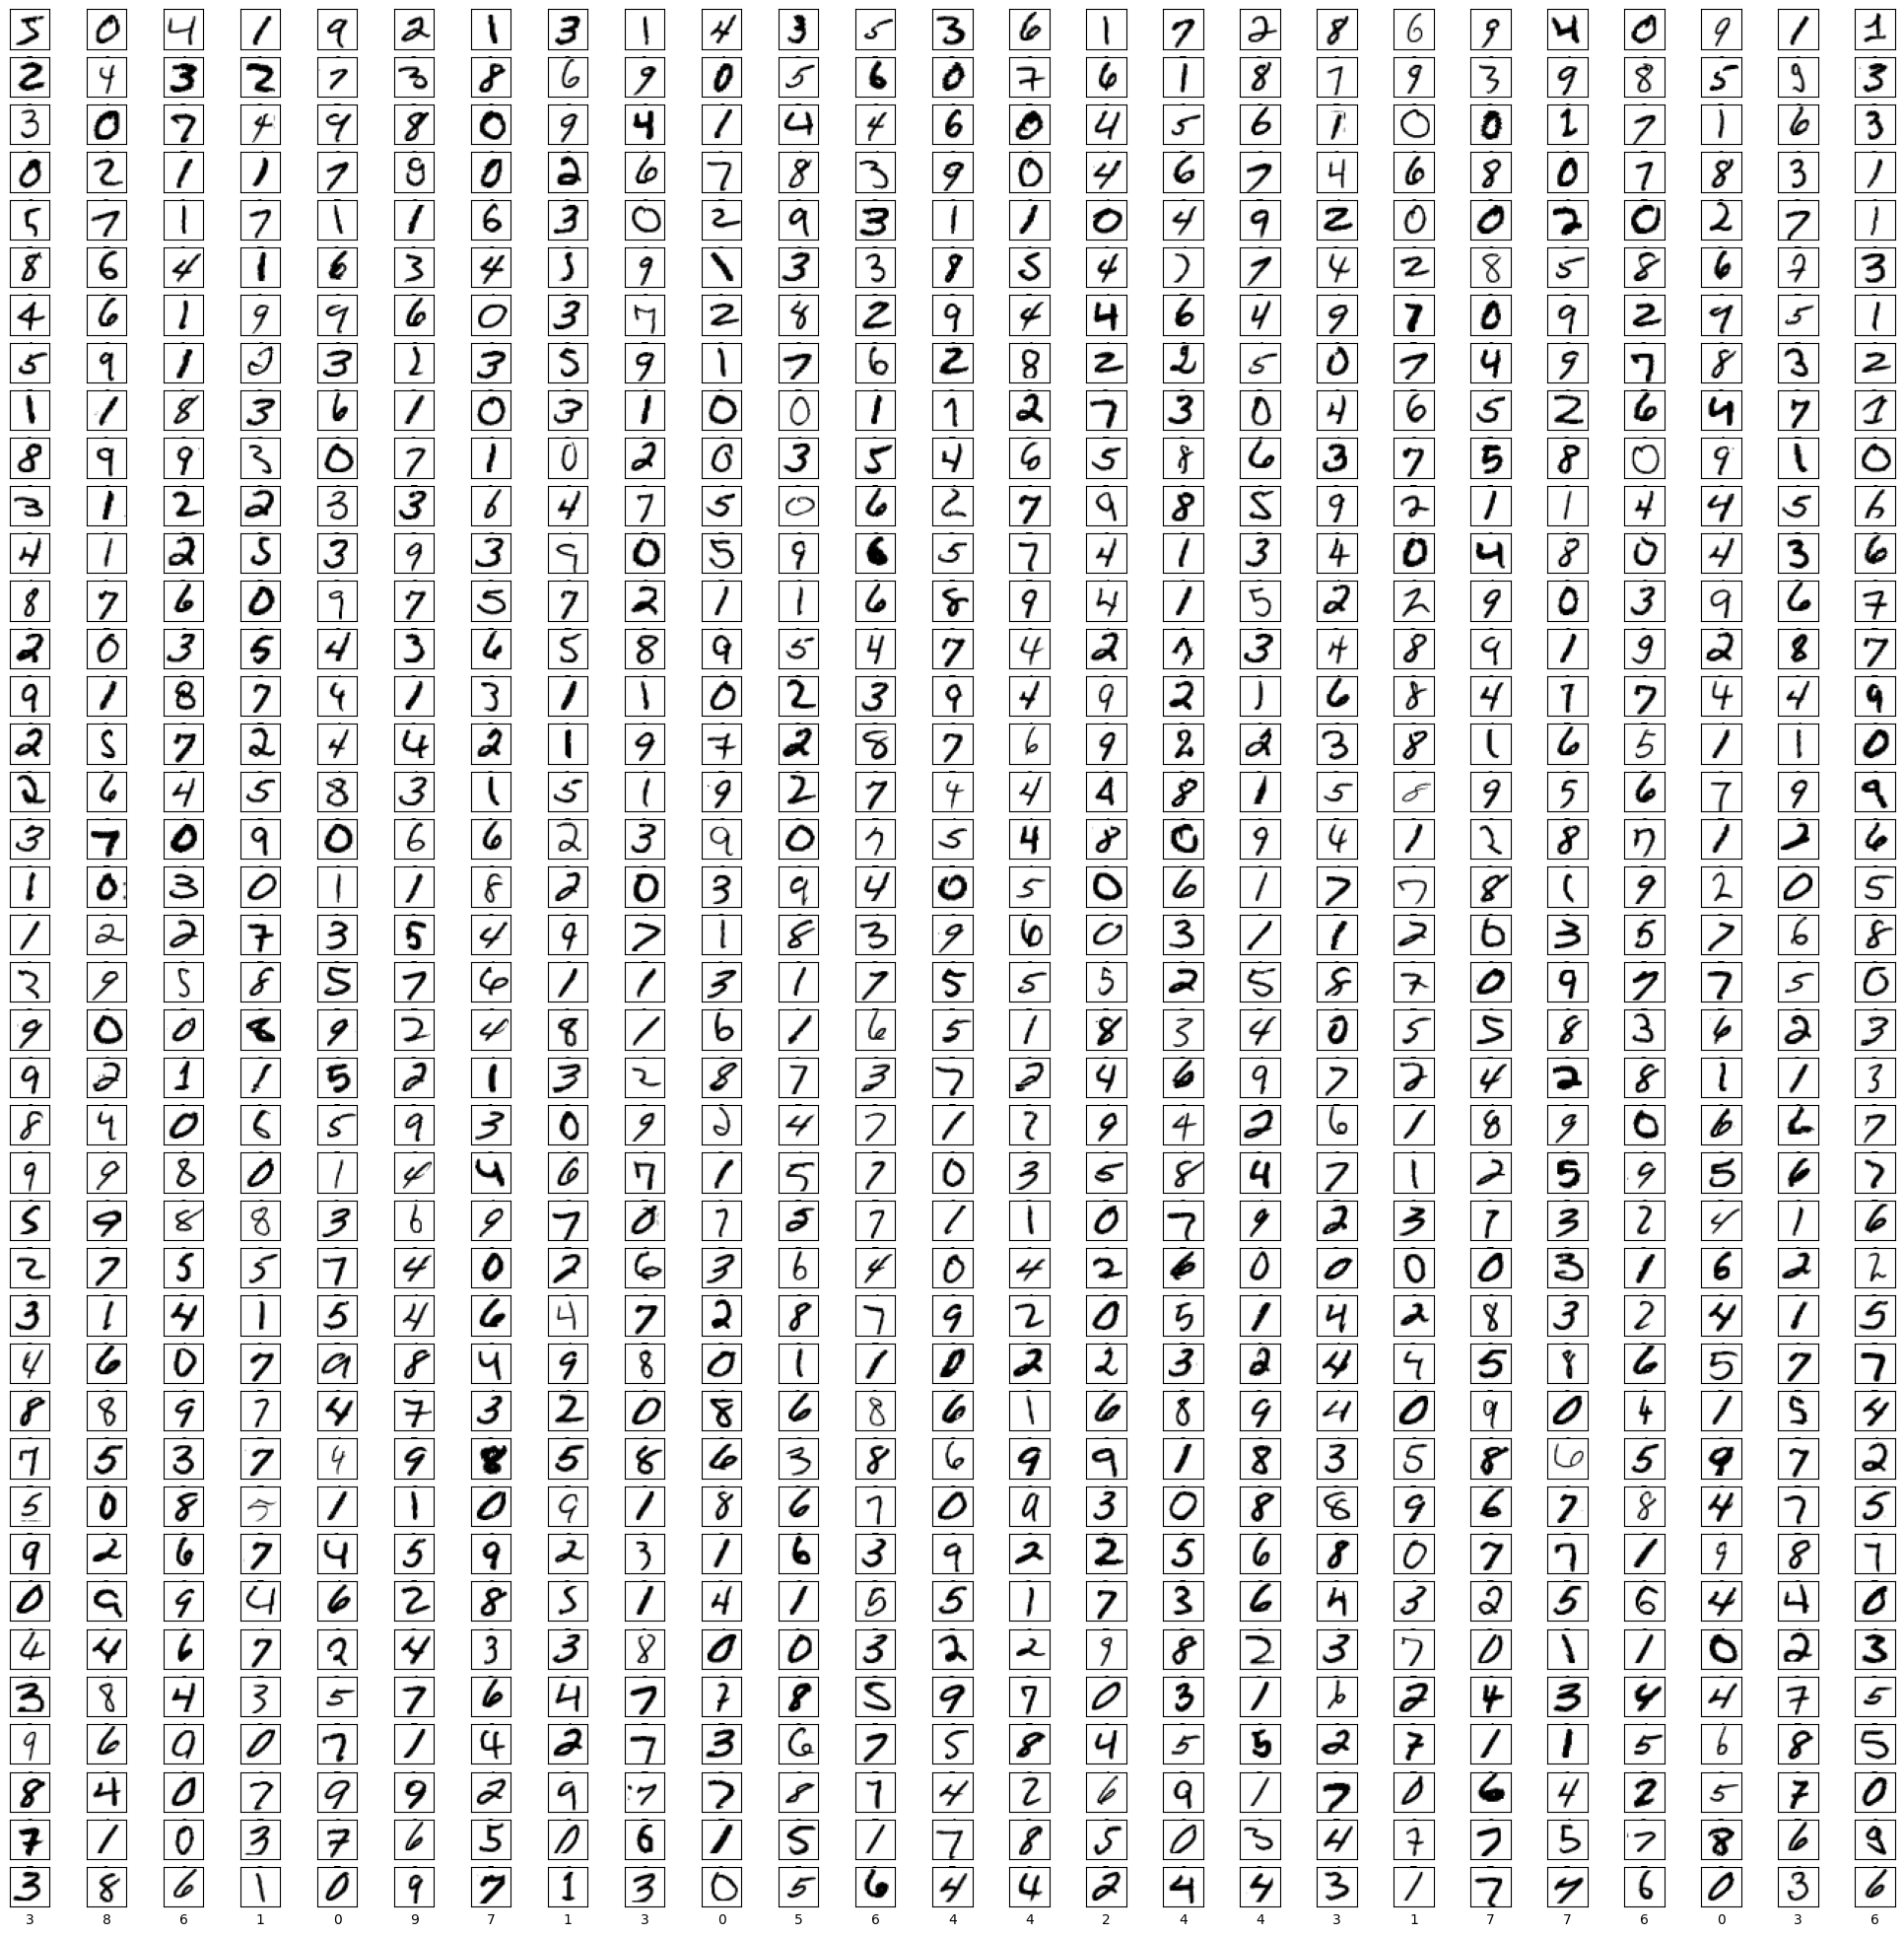

In [65]:
plt.figure(figsize=(25,25))
for i in range(1000):
    plt.subplot(40, 25, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

#### 1.5.3 Tabel tentang Training Data - Banyak Data berdasarkan Angka Tertulis



In [68]:
label_counts = pd.Series(train_labels).value_counts().sort_index()

In [69]:
label_counts_df = label_counts.reset_index()
label_counts_df.columns = ['Label', 'Count']

In [70]:
print(label_counts_df)

   Label  Count
0      0   5923
1      1   6742
2      2   5958
3      3   6131
4      4   5842
5      5   5421
6      6   5918
7      7   6265
8      8   5851
9      9   5949


## 2. Data Preprocessing

### 2.1 Reshape Dataset


Agar Keras dapat membaca gambar dan menggunakannya secara efisien, harus melakukan reshape pada `train_images` menjadi 1 dimensi alih-alih 2
</br>
</br>
Penjelasan : </br>
[Github](https://github.com/ageron/handson-ml/issues/265)
</br>
[StackOverflow](https://stackoverflow.com/questions/61056816/deep-learning-with-keras-mnist-database-query-why-to-convert-from-int-to-float)

In [71]:
train_images = train_images.reshape((60000, 28*28))

`train_images` diubah yang awalnya 2D (28 x 28 pixel) menjadi 1D (784 pixel). Buktinya akan ditunjukkan oleh kode dibawah ini.

In [72]:
train_images.shape

(60000, 784)

In [73]:
test_images = test_images.reshape((10000, 28*28))


In [74]:
test_images.shape

(10000, 784)

### 2.2 Normalisasi Dataset

In [75]:
train_images = train_images.astype('float32') / 255

Tipedata yang sebelumnya array NumPy `train_images` menjadi `float32`.
</br></br>
Mengubah tipe data menjadi float berfungsi untuk melakukan perhitungan yang lebih akurat karena akan memunculkan nilai desimal yang sangat berguna dalam perhitungan numerik yang digunakan didalam Machine Learning
</br> </br>
Dalam citra Grayscale, nilai pixel ada diantara 0 - 255. `/ 255` bertujuan adalah untuk membuat rentang nilainya berada di antara [0,1]



> Sebagai contoh, sebuah nilai piksel $0$ tetap $0$.</br>Sebuah nilai piksel $255$ menjadi:
$\frac{255}{255} = 1$</br>Sebuah nilai piksel $128$ menjadi:</br>$\frac{128}{255} \approx 0.502$





In [76]:
test_images = test_images.astype('float32') / 255

### 2.3 Encode Label Secara Kategoris menggunakan One-Hot Encoding

In [77]:
from keras.utils import to_categorical


Mengimpor fungsi `to_categorical` dari modul `keras.utils`. Fungsi ini digunakan untuk mengubah label integer menjadi format [one-hot encoding](https://www.geeksforgeeks.org/ml-one-hot-encoding/).



In [78]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Merupakan proses one-hot encoding.

## 3. Method 1 - Dense Layer


### 3.1 Model Building

In [79]:
from keras import models
from keras import layers

In [80]:
model = models.Sequential()

Model yang akan dipakai adalah [**Sequential Model**](https://keras.io/guides/sequential_model/) yang dimana setiap lapisan memiliki secara tepat satu input tensor dan satu output tensor

Layer merupakan elemen paling dasar dari jaringan syaraf (neural networks).  Sebuah layer berisi fungsi perhitungan untuk data masuk (data in) dan data keluar (data out).

Pada Metode ini akan digunakan **Two Dense Layers** dimana keduanya densely connected atau fully connected. Konteks "dense" disini adalah setiap neuron di lapisan tersebut terhubung ke semua neuron di lapisan sebelumnya.

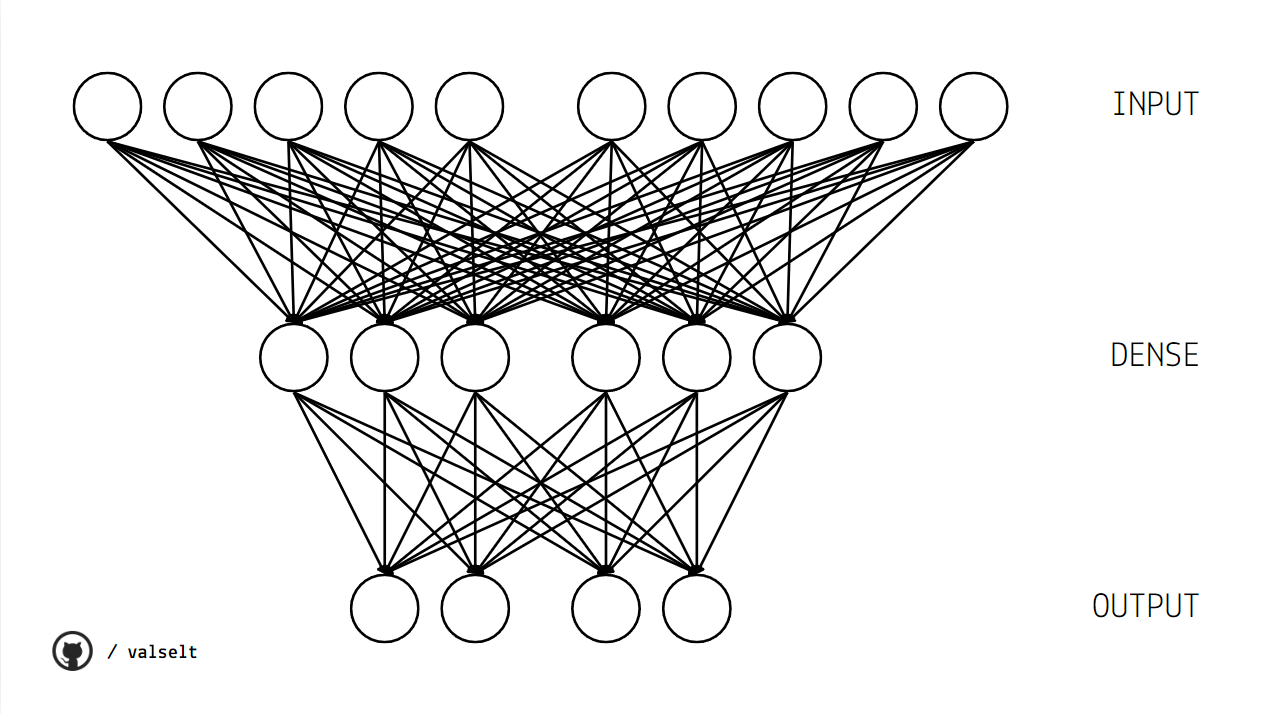

In [81]:
model.add(layers.Dense(512, activation = "relu", input_shape = (28*28, )))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Dalam line `512` ini, dijelaskan bahwa layer pertama dari Dense mempunyai 512 unit atau neuron

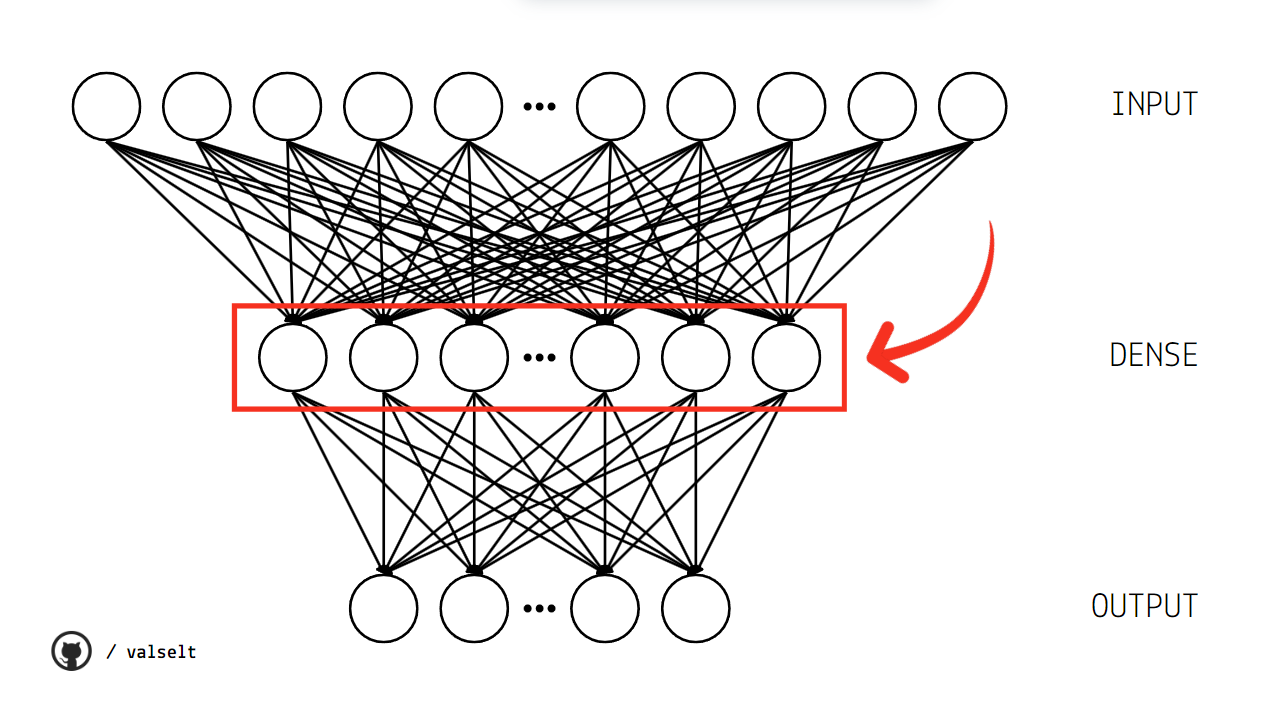

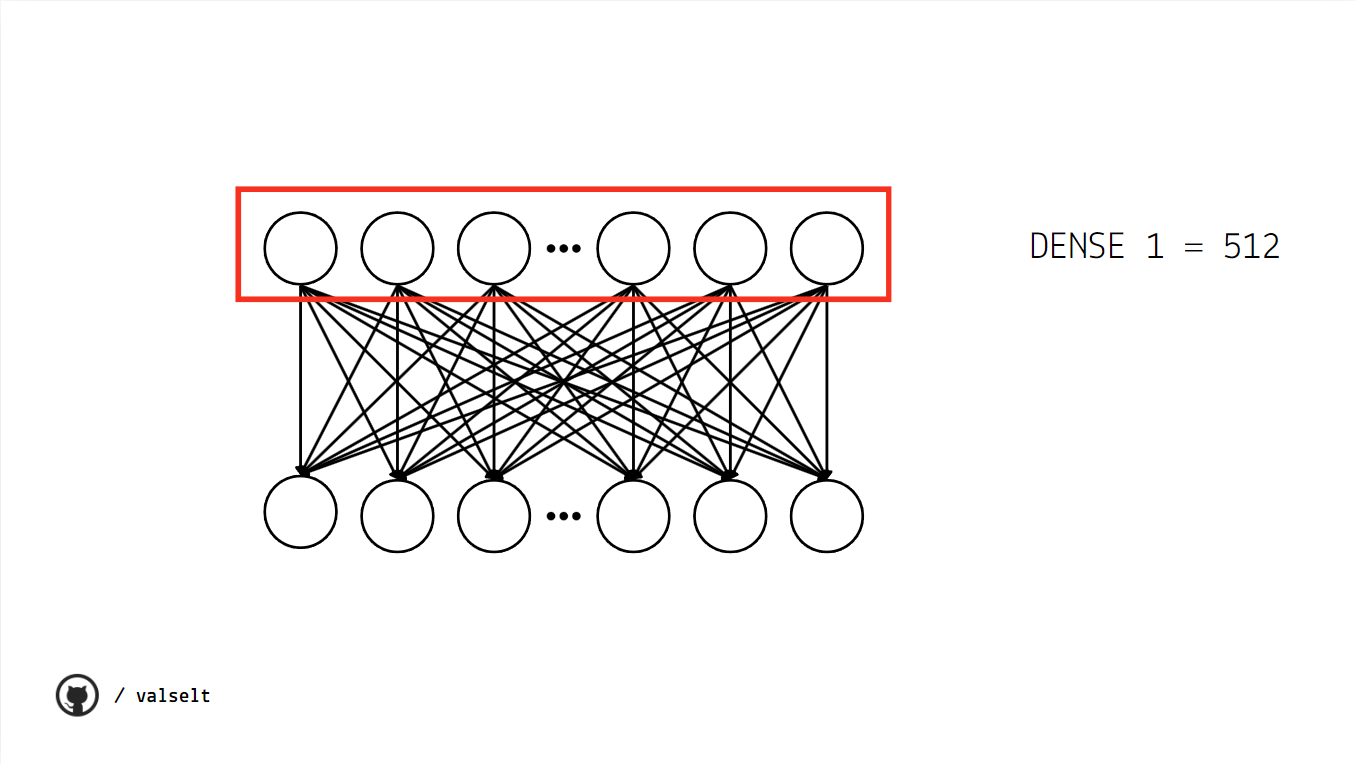

[Activation Function](https://www.geeksforgeeks.org/understanding-activation-functions-in-depth/) adalah komponen penting dalam jaringan saraf yang menentukan apakah suatu neuron harus diaktifkan atau tidak berdasarkan input yang diterimanya. Fungsi ini membantu model belajar pola dari data dan memungkinkan jaringan saraf untuk memodelkan hubungan non-linear.

`activation = "relu"`  menunjukkan activation function yang digunakan adalah ReLU (Rectified Linear Unit). ReLU mengubah nilai input negatif menjadi nol dan membiarkan nilai positif tetap, yaitu:

$f(x)=max(0,x)$


Setelahnya, `input_shape = (28*28, )` menunjukkan input shape dari gambar dataset

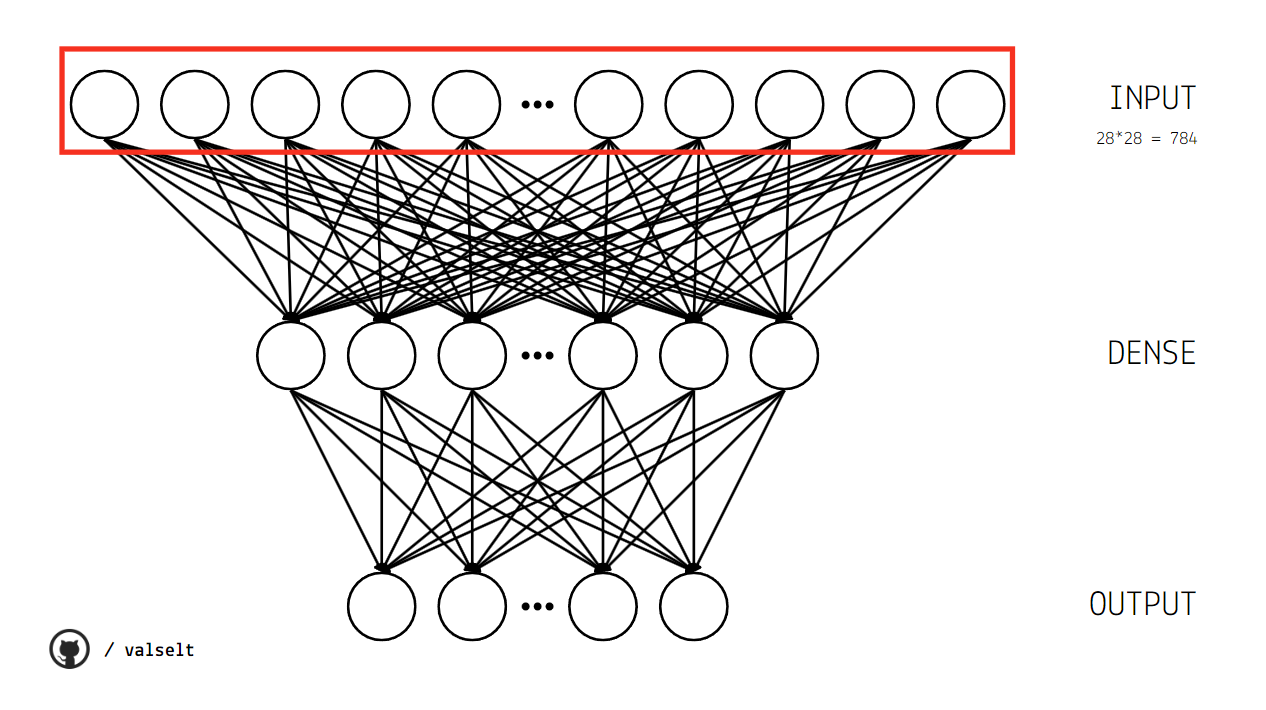

In [82]:
model.add(layers.Dense(10, activation = "softmax"))

Dalam line `10` ini, dijelaskan bahwa layer pertama dari Dense mempunyai 10 unit atau neuron

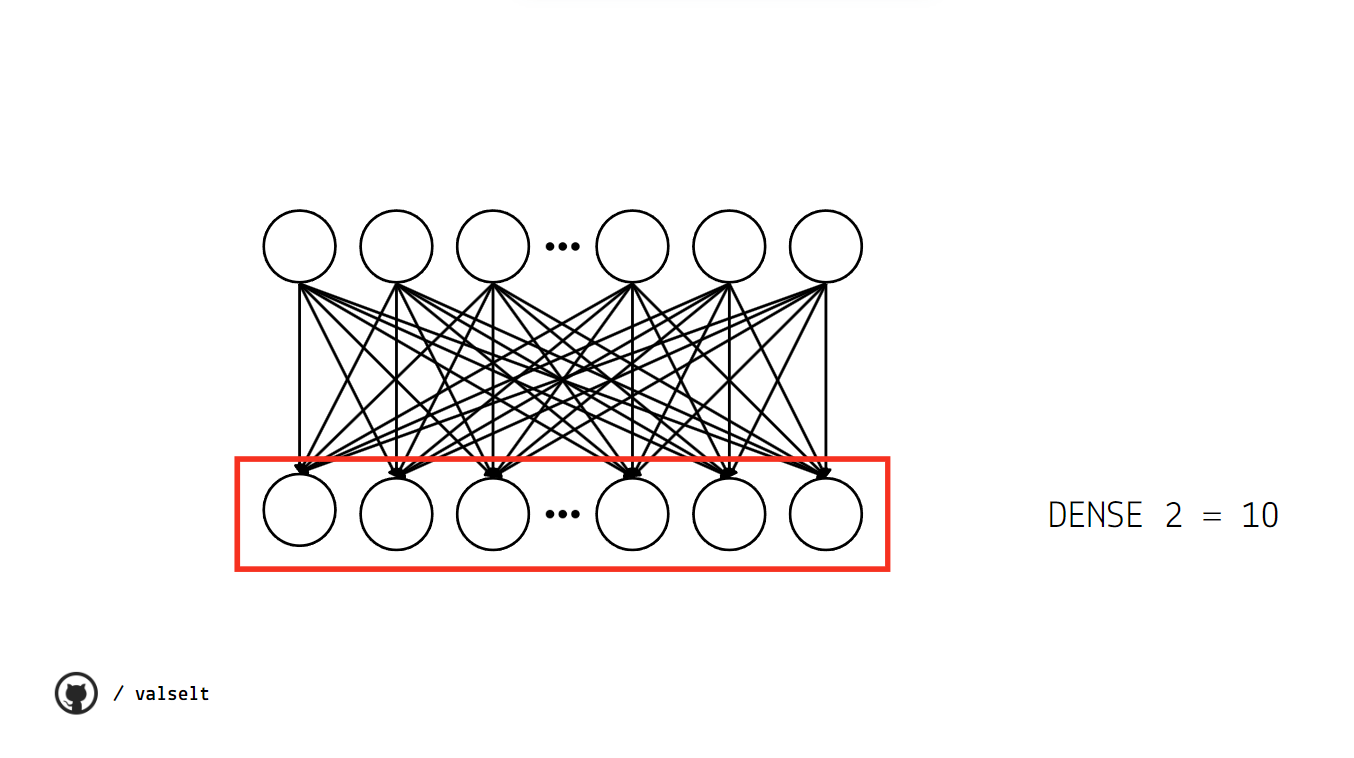

`activation = "softmax"` menunjukkan activation Function yang digunakan pada lapisan kedua adalah **Softmax**.</br>

Softmax mengubah keluaran dari lapisan terakhir menjadi distribusi probabilitas. Hasil dari fungsi softmax akan berada di rentang 0 hingga 1, dan jumlah total keluaran dari semua neuron akan sama dengan 1. Softmax sangat berguna untuk klasifikasi multi-kelas, di mana kita ingin menentukan kelas mana yang paling mungkin dari sekumpulan kelas.

</br>
Rumus Softmax :
$f(x_i) = \frac{ex_i}{Σ_j e^x_j}$

In [83]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

Diatas merupakan rangkuman dari model yang sudah dibuat.

Parameter adalah nilai-nilai yang ditentukan selama pelatihan model dan digunakan untuk membuat prediksi. Parameter ini mengontrol bagaimana model melakukan komputasi berdasarkan input yang diberikan.
</br></br>
Sebagai contoh, pada layer pertama yang bernama `dense (Dense)` memiliki parameter sekitar 401920 yang didapat dari :

$28$ $\times$ $28$ $\times$ $512$
yang ditambah dengan bias yaitu $512$ menjadi  $401920$</br></br>

Pada layer kedua yang bernama `dense_1 (Dense)` memiliki parameter sekitar 5130 yang didapat dari :

$512$ $\times$ $10$ yang ditambah dengan bias 10 menjadi $5130$

In [84]:
model.compile(optimizer= "rmsprop",
             loss = "categorical_crossentropy",
             metrics = ["accuracy"])

Model dikonfigurasi menggunakan `optimizer= "rmsprop" , loss = "categorical_crossentropy", metrics = ["accuracy"]`

Optimizer akan menentukan bagaimana model akan mengupdate dirinya sendiri. </br>
  [Algoritma RMSprop](https://keras.io/api/optimizers/rmsprop/)

Loss Function akan menilai performa dari training data dengan mengukur seberapa baik model memprediksi output yang benar selama pelatihan. </br>

[Cross Entropy](https://www.v7labs.com/blog/cross-entropy-loss-guide#:~:text=Categorical%20Cross%20Entropy%20is%20also,N%20classes%20for%20each%20image.)

Untuk memonitor saat training dan testing, digunakan sebuat metrics. Yang dipilih disini adalah **accuracy**

### 3.2 Train Model

In [85]:
model.fit(train_images,
         train_labels,
         epochs = 5,
         batch_size = 128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8728 - loss: 0.4391
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9675 - loss: 0.1110
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9794 - loss: 0.0720
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.9859 - loss: 0.0487
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9886 - loss: 0.0392


`model.fit` digunakan untuk melatih model untuk belajar dari training data</br>
`epoch` menentukan berapa kali seluruh dataset akan diproses oleh model selama pelatihan. Satu epoch berarti model melakukan satu forward pass dan melakukan satu backward pass

>  **Forward Pass** : Model memproses data input yang melewati layer layer dense, menghasilkan prediksi berdasarkan bobot yang ada saat ini



> **Backward Pass** : Model memperbarui bobotnya menggunakan Optimizer berdasarkan perhitungan kesalahan (loss/error) antara prediksi model dan target sebenarnya

`batch_size` merupakan jumlah sampel yang digunakan dalam satu Forward Pass dan Backward Pass. `batch_size = 128` berarti batch size-nya adalah 128, yang berarti model akan memproses 128 gambar sekaligus sebelum melakukan update pada bobot-bobotnya. Namun, penggunaan batch size yang tinggi sejalan dengan pemakaian memori dan komputasi yang tinggi juga.





Setelah dilakukan Training, maka model akan ditest menggunakan `test_images`

### 3.3 Test Model

In [86]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("test_loss : ", test_loss,"\ntest_acc : ", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9770 - loss: 0.0743
test_loss :  0.06330472230911255 
test_acc :  0.9800000190734863


Seperti dapat dilihat di `test_acc` disini nilainya menurun sedikit daripada di training yang nilainya `accuracy: 0.9886`


## 4. Method 2 - CNN

Bedanya Dense Layer sama Convolutional Layer apa sih?

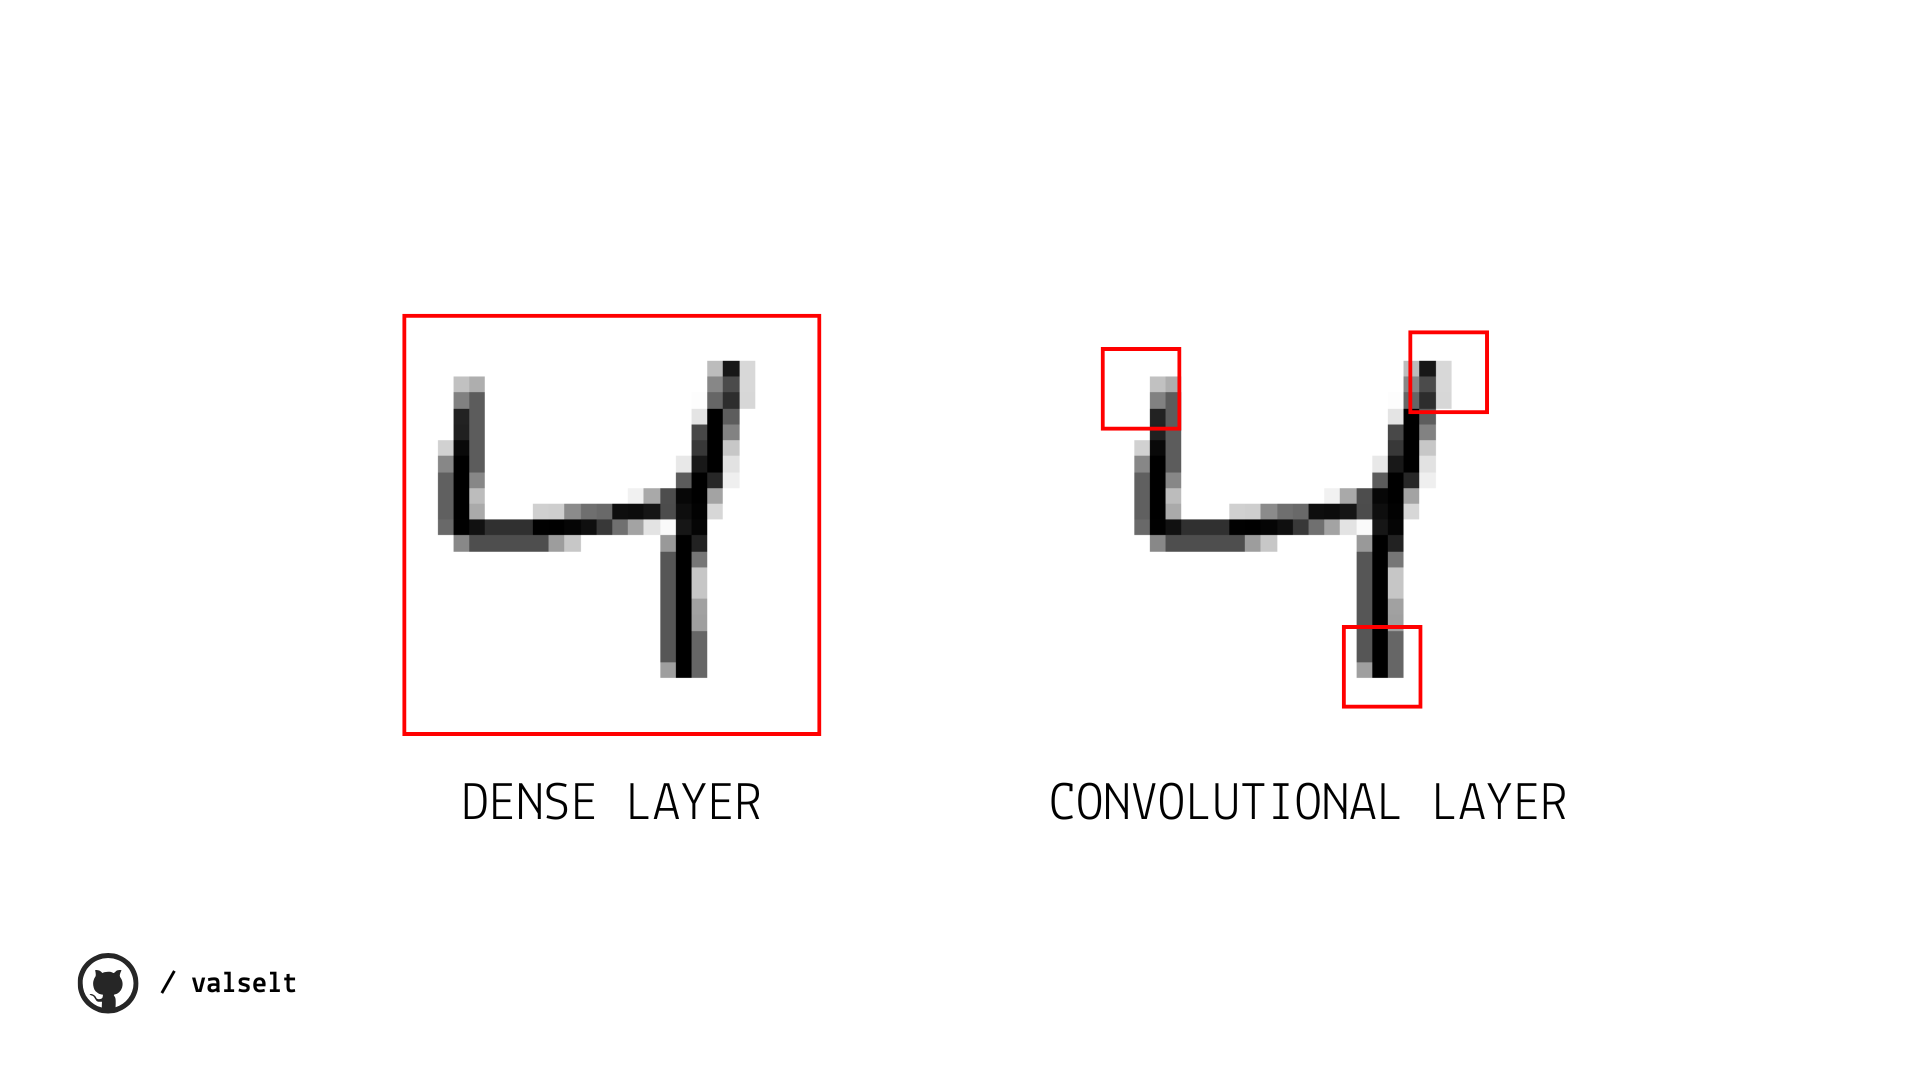


Model yang memakai **Dense Layer** hanya bisa belajar dari Global Pattern dari semua pixel yang ada didalam gambar.

> Dense layer menghubungkan setiap neuron di lapisan sekarang dengan setiap neuron di lapisan sebelumnya. Artinya, setiap neuron di dense layer mendapatkan input dari seluruh gambar atau fitur yang dihasilkan oleh lapisan sebelumnya.</br></br>
Sebagai akibatnya, dense layer menangkap pola yang bersifat global, yaitu pola yang melibatkan keseluruhan gambar. Namun, karena semua neuron terhubung, model yang kita buat dapat menjadi lebih rumit dan cenderung lebih sulit untuk dioptimalkan pada data besar seperti pada gambar.

Sedangkan **Convolutional Layer** dapat belajar dari Local Pattern. Artinya, Convolutional Layer dapat mengambil sebagian kecil area pixel yang ada didalam gambar untuk diteliti.


> Karena pengambilan sebagian kecil area pixel pada gambar inilah yang membuat model "lebih ringan" karena parameter yang digunakan lebih sedikit tentunya sebagai akibat dari pembagian bobot di seluruh gambar.

</br>



Referensi yang Mungkin bisa dipakai :
[Dense or Convolutional Neural Network - by Medium](https://medium.com/analytics-vidhya/dense-or-convolutional-part-1-c75c59c5b4ad)

### 4.1 Import Dataset

In [106]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import pandas as pd

In [107]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### 4.2 Reshape Dataset


In [108]:
train_images = train_images.reshape((60000,28,28,1))
test_images = test_images.reshape((10000,28,28,1))


### 4.3 Normalisasi Dataset

In [109]:
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

### 4.4 One-Hot Encoding

In [110]:
from keras.utils import to_categorical

In [111]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### 4.5 Model Building

In [112]:
from keras import layers
from keras import models

In [113]:
model = models.Sequential()

In [114]:
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape = (28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(10, activation= 'softmax'))


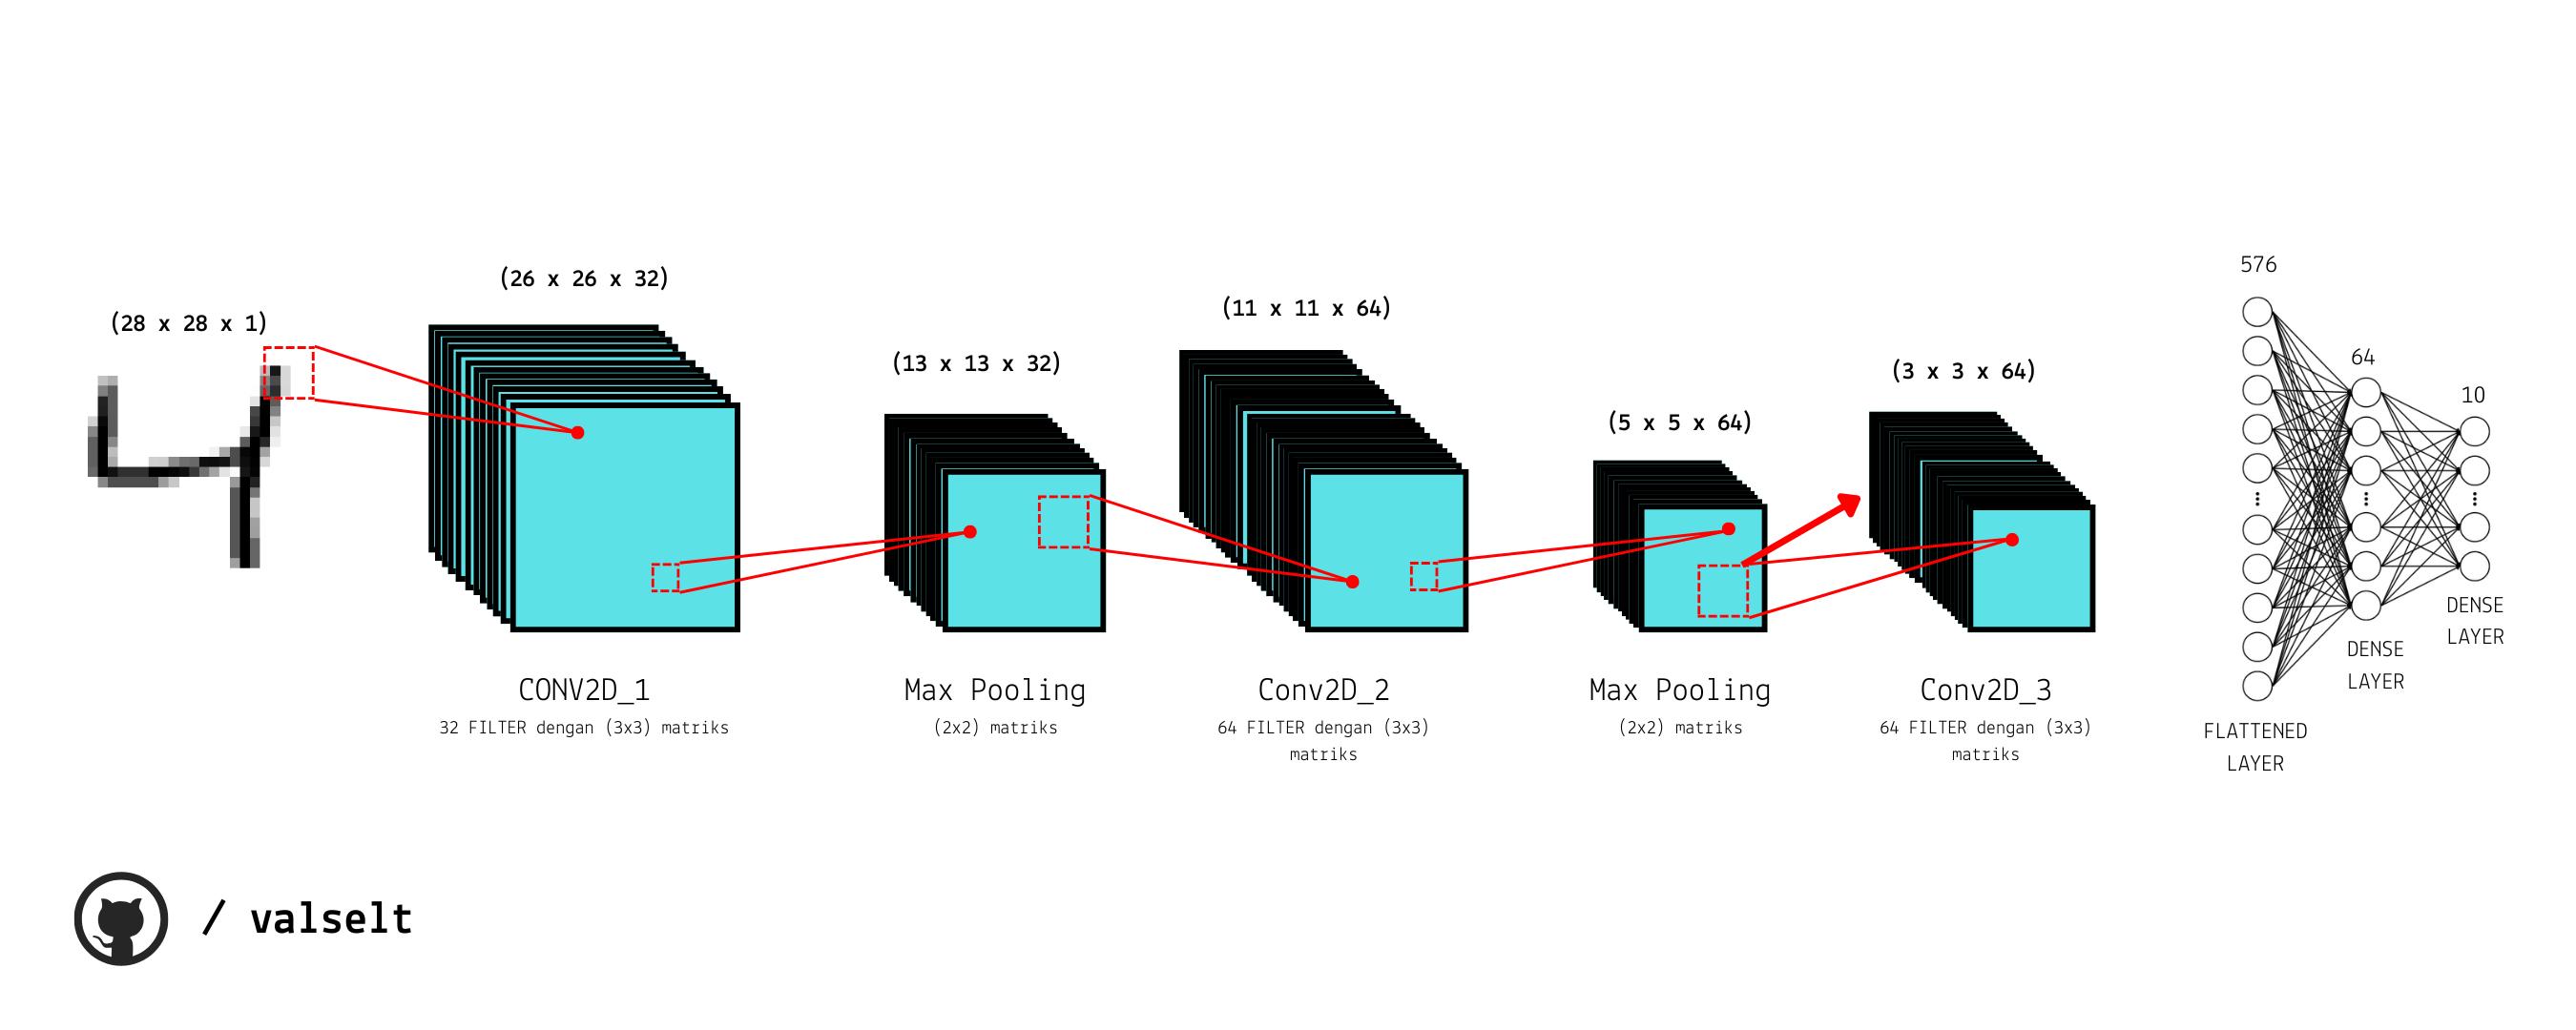

**Conv Layer** merupakan sekumpulan filter dan setiap filternya dapat mendeteksi pattern yang spesifik.



`model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape = (28,28,1)))`

Pada layer Conv2D pertama (**CONV2D_1**), akan digunakan 32 filter berukuran 3 $\times$ 3 yang berbeda tugasnya dan anak mengeluarkan output 26 $\times$ 26 pixel.


> Alasan tidak 28 $\times$ 28 outputnya adalah karena [border effect](https://medium.com/dataseries/border-effects-and-transition-steps-in-convolutional-neural-networks-75bc6a44fd43)




`model.add(layers.MaxPooling2D((2,2)))`

Setelahnya, Max Pooling akan digunakan untuk mengurangi ukuran inputannya dengan melakukan operasi yang mencari nilai maksimum dari sebuah blok tensor.

Sebagai contoh, max pooling yang dilakukan adalah 2 $\times$ 2 maka hasil outputnya adalah 13 $\times$ 13

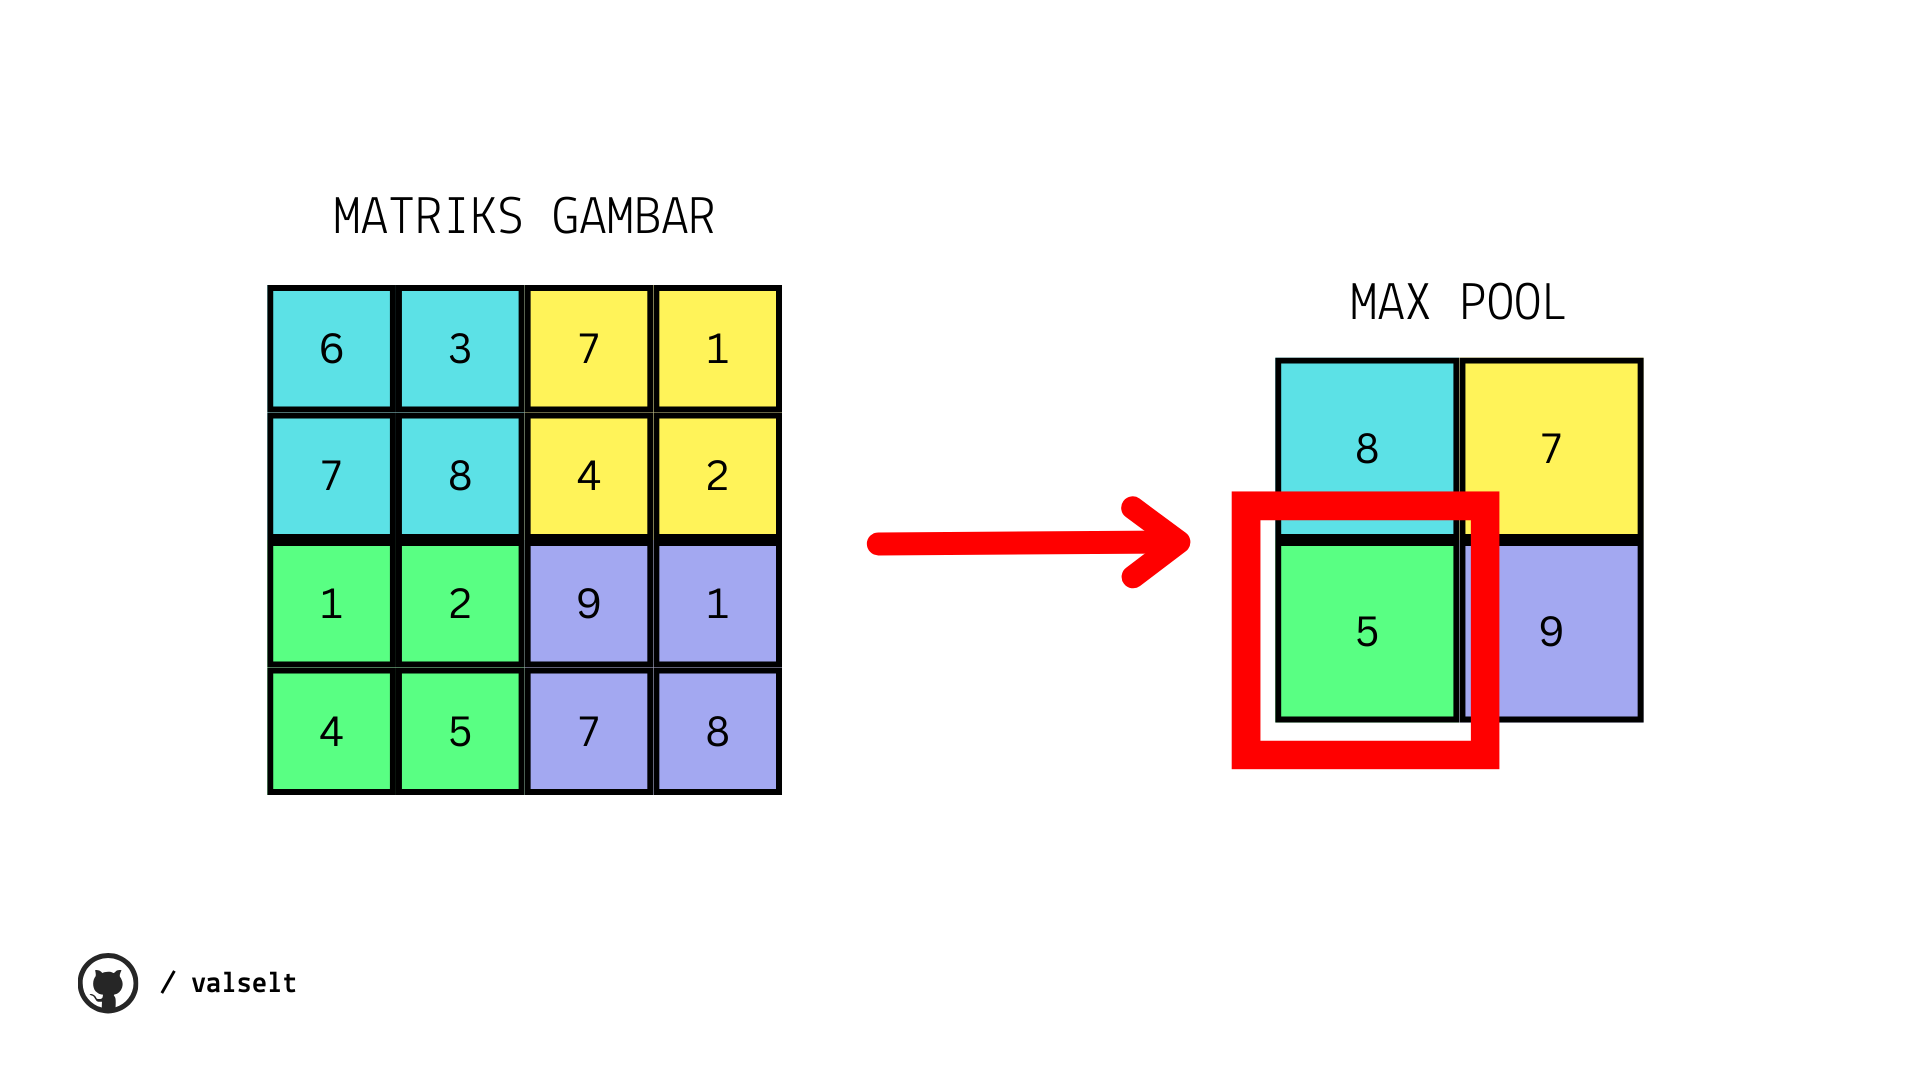

`model.add(layers.Conv2D(64,(3,3), activation='relu'))` </br>
Pada layer Conv2D kedua (**CONV2D_2**), akan digunakan 64 filter berukuran 3  ×  3 yang berbeda tugasnya dan anak mengeluarkan output 11  ×  11 pixel.

`model.add(layers.MaxPooling2D((2,2)))`</br>
Max pooling 2 $\times$ 2 yang menghasilkan output adalah 5 $\times$ 5

`model.add(layers.Conv2D(64,(3,3), activation='relu'))`</br>
Pada layer Conv2D terakhir (**CONV2D_3**), akan digunakan 64 filter berukuran 3 × 3 yang berbeda tugasnya dan anak mengeluarkan output 3 × 3 pixel.

`model.add(layers.Flatten())`

Pada Poin 2.1, sudah dijelaskan bahwa Dense Layer optimal ketika menjalankan di 1 Dimensi, sedangkan hasil output dari Conv2D terakhir adalah 2 Dimensi. Maka, output di "flatten" menggunakan line diatas agar menjadi 1 Dimensi.

In [115]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [116]:
model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [118]:
model.fit(train_images,
          train_labels,
          epochs=5,
          batch_size = 64)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 69s 72ms/step - accuracy: 0.8753 - loss: 0.4019
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 60s 64ms/step - accuracy: 0.9846 - loss: 0.0520
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 66ms/step - accuracy: 0.9888 - loss: 0.0362
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 59s 63ms/step - accuracy: 0.9929 - loss: 0.0233
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 57s 61ms/step - accuracy: 0.9941 - loss: 0.0193


In [119]:
model.evaluate(test_images, test_labels)[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9842 - loss: 0.0488


0.9889000058174133